Md Aftahee Toyan, 21031218

In [1]:
# importing necessary libraries

import numpy as np
import wbgapi as wb
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from scipy.stats import norm
%matplotlib inline
# creating a country codes list and indicator id list
# EN.ATM.CO2E.PC = CO2 emissions (metric tons per capita)

country_codes = ["GBR","USA","BGD"]
indicator_id = ["EN.ATM.CO2E.PC"]
# creating dataframe for clustering

df = wb.data.DataFrame(indicator_id,country_codes,skipAggs=True, mrv=10, columns='series', numericTimeKeys=True)
df.index.names = ['country','year']
df["co2"] = pd.to_numeric(df["EN.ATM.CO2E.PC"])
df = df.drop(['EN.ATM.CO2E.PC'], axis =1)
df

co2
country year           
BGD     2009   0.306665
        2010   0.342740
        2011   0.364567
        2012   0.384025
        2013   0.396566
        2014   0.412899
        2015   0.458798
        2016   0.466776
        2017   0.492907
        2018   0.512837
GBR     2009   7.468655
        2010   7.675926
        2011   7.025425
        2012   7.332471
        2013   7.064903
        2014   6.421598
        2015   6.148545
        2016   5.774742
        2017   5.546266
        2018   5.398708
USA     2009  16.818868
        2010  17.434196
        2011  16.599404
        2012  15.771145
        2013  16.102958
        2014  16.026379
        2015  15.535342
        2016  15.131747
        2017  14.805882
        2018  15.240875

In [2]:
# resetting index to convert Multiindexed dataframe

df = df.reset_index(level=[1])
df

,year,co2
country,,
BGD,2009,0.306665
BGD,2010,0.342740
BGD,2011,0.364567
BGD,2012,0.384025
BGD,2013,0.396566
BGD,2014,0.412899
BGD,2015,0.458798
BGD,2016,0.466776
BGD,2017,0.492907


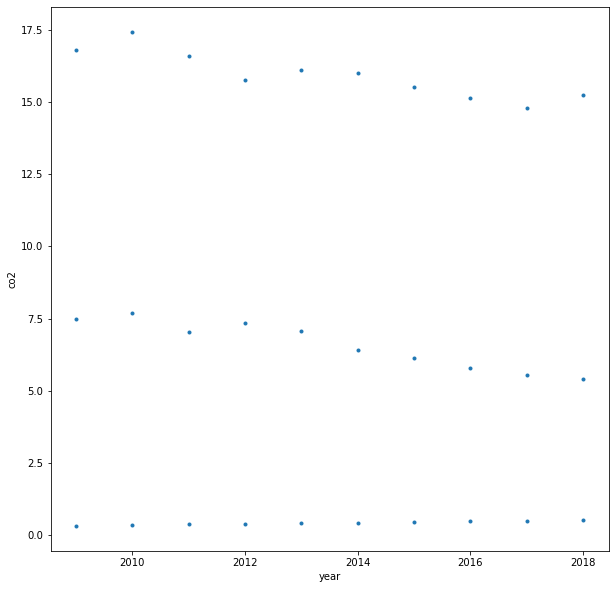

In [3]:
# plotting function
def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(10.0,10.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
# plotting the datapoints of the dataframe
makeplot(df, "year", "co2")

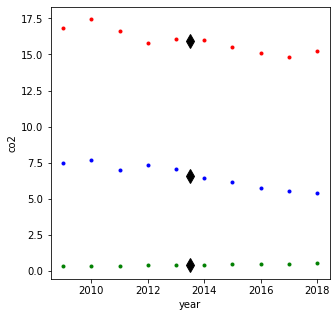

In [4]:
import sklearn.cluster as cluster

####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=3)

# extract columns for fitting
df_fit = df[["year", "co2"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green"]
for l in range(3):     # loop over the different labels
    plt.plot(df_fit["year"][labels==l], df_fit["co2"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("year")
plt.ylabel("co2")
plt.show()

In [5]:
# creating dataframe of BGD for fitting and modeling
country_code = ["BGD"]
indicator_id = ["EN.ATM.CO2E.PC"]
df_2 = wb.data.DataFrame(indicator_id,country_code,skipAggs=True, mrv=20, columns='series', numericTimeKeys=True)
df_2.index.names = ['year']
df_2["co2"] = pd.to_numeric(df_2["EN.ATM.CO2E.PC"])
df_2 = df_2.drop(['EN.ATM.CO2E.PC'], axis =1)
df_2

,co2
year,
1999,0.160636
2000,0.169594
2001,0.198172
2002,0.207053
2003,0.212402
2004,0.222869
2005,0.235264
2006,0.254752
2007,0.266297


In [6]:
# resetting index to convert Multiindexed dataframe

df_2 = df_2.reset_index(level=[0])
df_2

,year,co2
0,1999,0.160636
1,2000,0.169594
2,2001,0.198172
3,2002,0.207053
4,2003,0.212402
5,2004,0.222869
6,2005,0.235264
7,2006,0.254752
8,2007,0.266297
9,2008,0.288141


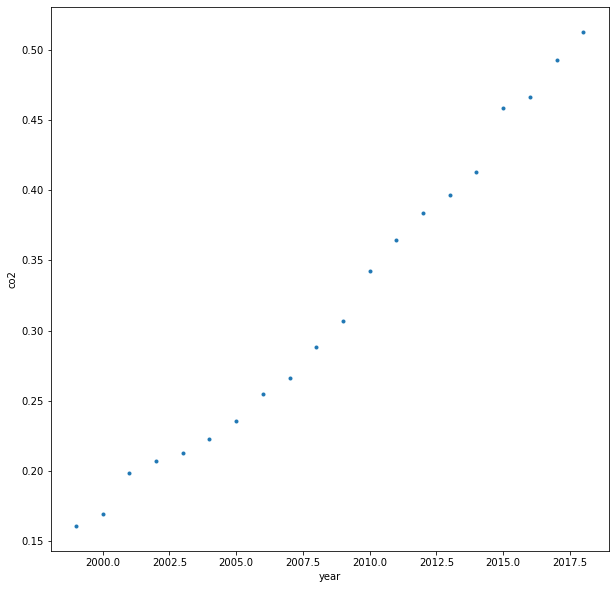

In [7]:
# plotting the data
makeplot(df_2, "year", "co2")

parameters: [1.28316213e+00 8.19484910e-02 2.02274427e+03]
std. dev. [0.31013994 0.00733251 5.21032046]


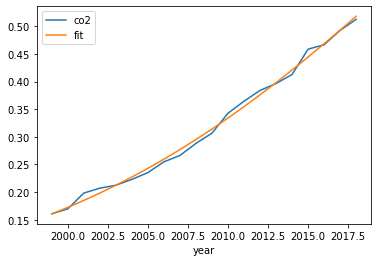

In [8]:
# defining the function for the curve fit

def logistic(t, n0, g, t0):
    """Calculates the logistic function with scale factor n0 and growth rate g"""
    
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

# calculating parameters, sigma and variance-covariance matrix

param, covar = opt.curve_fit(logistic, df_2["year"], df_2["co2"], 
                             p0=(3e12, 0.03, 2000.0))
sigma = np.sqrt(np.diag(covar))
print("parameters:", param)
print("std. dev.", sigma)

df_2["fit"] = logistic(df_2["year"], *param)

df_2.plot("year", ["co2", "fit"])
plt.show()

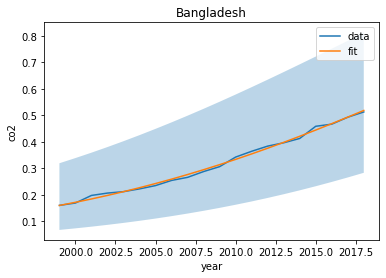

In [9]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper


# calculating upper and lower limits

low, up = err_ranges(df_2["year"], logistic, param, sigma)

# plotting the graph showing data, best fit and confidence ranges

plt.figure()
plt.title("Bangladesh")
plt.plot(df_2["year"], df_2["co2"], label="data")
plt.plot(df_2["year"], df_2["fit"], label="fit")

plt.fill_between(df_2["year"], low, up, alpha=0.3)
plt.legend()
plt.xlabel("year")
plt.ylabel("co2")
plt.show()

In [10]:
# prediction of future values

print("Forecasted CO2 emmision for Bangladesh")
low, up = err_ranges(2030, logistic, param, sigma)
print("2030 between ", low, "and", up)
low, up = err_ranges(2040, logistic, param, sigma)
print("2040 between ", low, "and", up)
low, up = err_ranges(2050, logistic, param, sigma)
print("2050 between ", low, "and", up)

Forecasted CO2 emmision for Bangladesh
2030 between  0.5235649300373115 and 1.1992538129806207
2040 between  0.6915256618895975 and 1.4043424948925312
2050 between  0.8155930426426299 and 1.5100954585452817


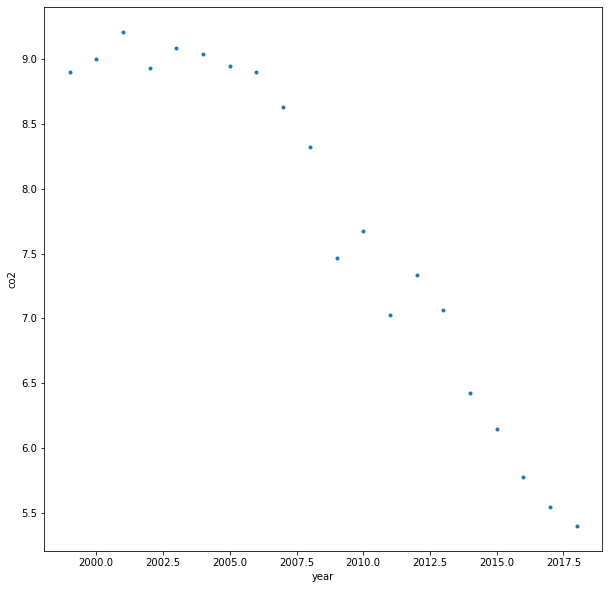

In [11]:
# creating dataframe of GBR for fitting and modeling

country_code = ["GBR"]
indicator_id = ["EN.ATM.CO2E.PC"]
df_GBR = wb.data.DataFrame(indicator_id,country_code,skipAggs=True, mrv=20, columns='series', numericTimeKeys=True)
df_GBR.index.names = ['year']
df_GBR["co2"] = pd.to_numeric(df_GBR["EN.ATM.CO2E.PC"])
df_GBR = df_GBR.drop(['EN.ATM.CO2E.PC'], axis =1)

# resetting index to convert Multiindexed dataframe
df_GBR = df_GBR.reset_index(level=[0])

# plotting the data points of the dataframe
makeplot(df_GBR, "year", "co2")

parameters: [ 9.68936276e+00 -1.56733580e-01  2.01878083e+03]
std. dev. [0.29949009 0.0219456  0.42287976]


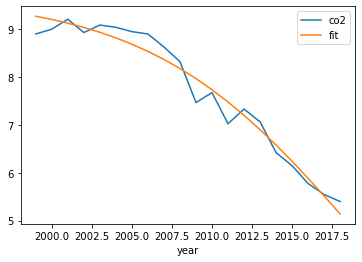

In [12]:
# calculating parameters, sigma and variance-covariance matrix
param, covar = opt.curve_fit(logistic, df_GBR["year"], df_GBR["co2"], 
                             p0=(3e12, 0.03, 2000.0))

sigma = np.sqrt(np.diag(covar))
print("parameters:", param)
print("std. dev.", sigma)

df_GBR["fit"] = logistic(df_GBR["year"], *param)

df_GBR.plot("year", ["co2", "fit"])
plt.show()

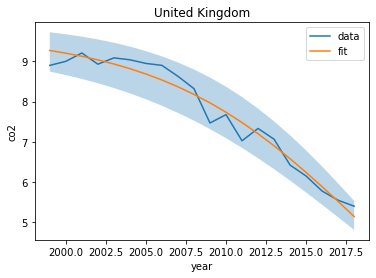

In [13]:
# calculating upper and lower limits

low, up = err_ranges(df_GBR["year"], logistic, param, sigma)

# plotting the graph showing data, best fit and confidence ranges

plt.figure()
plt.title("United Kingdom")
plt.plot(df_GBR["year"], df_GBR["co2"], label="data")
plt.plot(df_GBR["year"], df_GBR["fit"], label="fit")

plt.fill_between(df_GBR["year"], low, up, alpha=0.3)
plt.legend()
plt.xlabel("year")
plt.ylabel("co2")
plt.show()


In [14]:
# prediction of future values

print("Forcasted CO2 emmision for United Kingdom")
low, up = err_ranges(2030, logistic, param, sigma)
print("2030 between ", low, "and", up)
low, up = err_ranges(2040, logistic, param, sigma)
print("2040 between ", low, "and", up)
low, up = err_ranges(2050, logistic, param, sigma)
print("2050 between ", low, "and", up)

Forcasted CO2 emmision for United Kingdom
2030 between  1.0426239285912746 and 1.8899017182935554
2040 between  0.1924234061652572 and 0.5709373909532717
2050 between  0.032789677353933885 and 0.15487670692131103


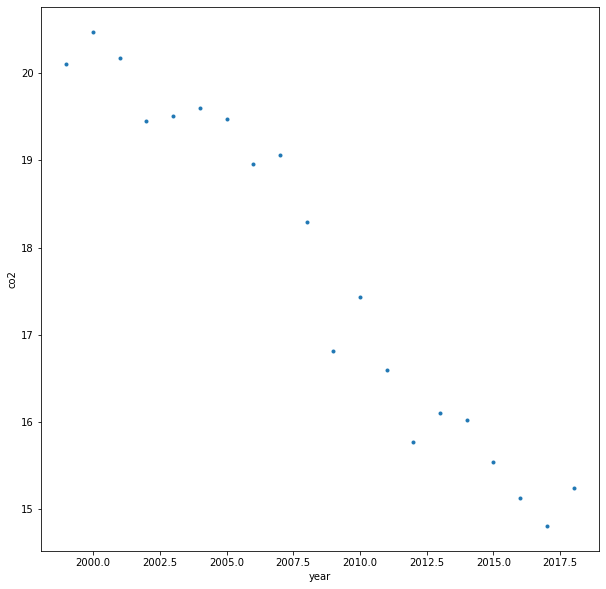

In [15]:
# creating dataframe of USA for fitting and modeling

country_code = ["USA"]
indicator_id = ["EN.ATM.CO2E.PC"]
df_USA = wb.data.DataFrame(indicator_id,country_code,skipAggs=True, mrv=20, columns='series', numericTimeKeys=True)
df_USA.index.names = ['year']
df_USA["co2"] = pd.to_numeric(df_USA["EN.ATM.CO2E.PC"])
df_USA = df_USA.drop(['EN.ATM.CO2E.PC'], axis =1)

# resetting index to convert Multiindexed dataframe
df_USA = df_USA.reset_index(level=[0])

# plotting the data points of the dataframe
makeplot(df_USA, "year", "co2")

parameters: [ 2.72449753e+01 -5.29515642e-02  2.02051230e+03]
std. dev. [6.14667242 0.02288531 7.56328939]


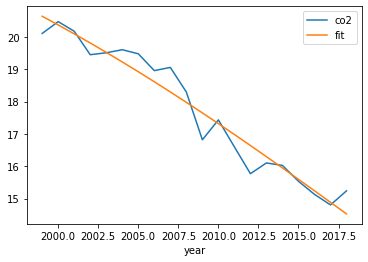

In [16]:
# calculating parameters, sigma and variance-covariance matrix
param, covar = opt.curve_fit(logistic, df_USA["year"], df_USA["co2"], 
                             p0=(3e12, 0.03, 2000.0))

sigma = np.sqrt(np.diag(covar))
print("parameters:", param)
print("std. dev.", sigma)

df_USA["fit"] = logistic(df_USA["year"], *param)

df_USA.plot("year", ["co2", "fit"])
plt.show()

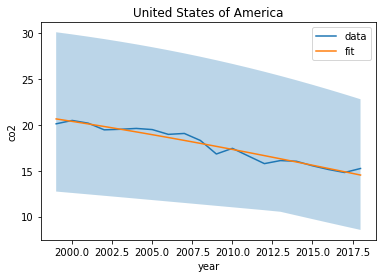

In [17]:
# calculating upper and lower limits

low, up = err_ranges(df_USA["year"], logistic, param, sigma)

# plotting the graph showing data, best fit and confidence ranges

plt.figure()
plt.title("United States of America")
plt.plot(df_USA["year"], df_USA["co2"], label="data")
plt.plot(df_USA["year"], df_USA["fit"], label="fit")

plt.fill_between(df_USA["year"], low, up, alpha=0.3)
plt.legend()
plt.xlabel("year")
plt.ylabel("co2")
plt.show()

In [18]:
# prediction of future values

print("Forcasted CO2 emmision for United States of America")
low, up = err_ranges(2030, logistic, param, sigma)
print("2030 between ", low, "and", up)
low, up = err_ranges(2040, logistic, param, sigma)
print("2040 between ", low, "and", up)
low, up = err_ranges(2050, logistic, param, sigma)
print("2050 between ", low, "and", up)

Forcasted CO2 emmision for United States of America
2030 between  4.543089126031355 and 16.21294967100805
2040 between  2.403195266281868 and 13.73456267865922
2050 between  1.198282554759581 and 11.383972157132947
